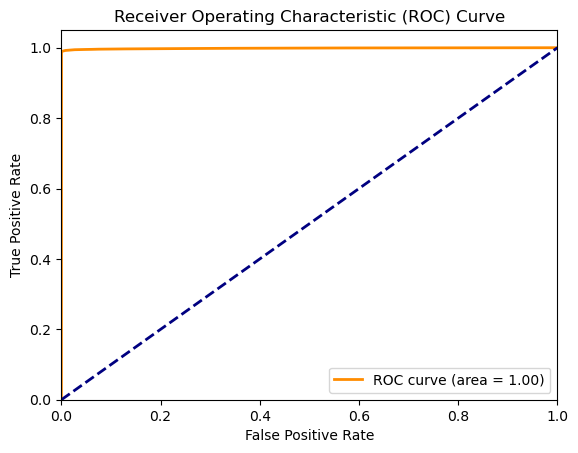

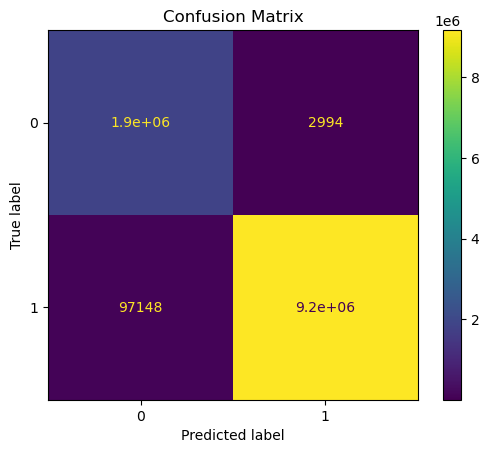

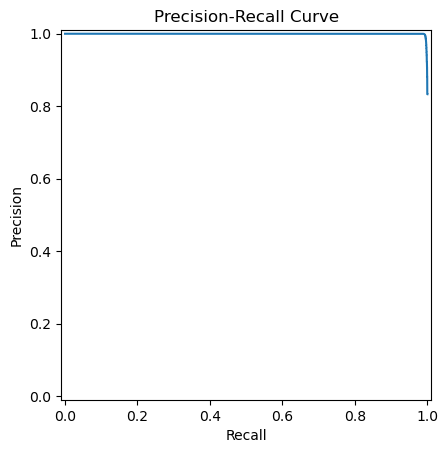

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_results.pkl'
models = load_model(model_filename)

# Load the dataset
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data_test.parquet')
df['VD'] = df['VD'].fillna(df['VD'].mean())

# Define X (features) and y (target)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/SL_21_models_downsampling_shuffle.pkl'
models = load_model(model_filename)

# Load the dataset
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data_test.parquet')
# Define X (features) and y (target)
df.dropna(subset=['labels'], inplace=True)
X_test = df.drop(columns=['labels'])  # Features
y_test = df['labels']  # Target labels

# model list: 
model_names = ['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV',
               'CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 
                'ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'PassiveAggressiveClassifier', 
                'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 
                'RidgeClassifierCV', 'SGDClassifier', 'XGBClassifier', 'LGBMClassifier']

names = ['CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis',
                'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'PassiveAggressiveClassifier']

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for model_name in models.keys():
    if model_name in names:
        model = models[model_name]
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - SMOTE')
plt.legend()
plt.show()

# from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
# for model_name in models.keys():
#     model = models[model_name]['model']
#     PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())

# plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('PR curves - SMOTE')
# plt.legend()
# plt.show()


: 

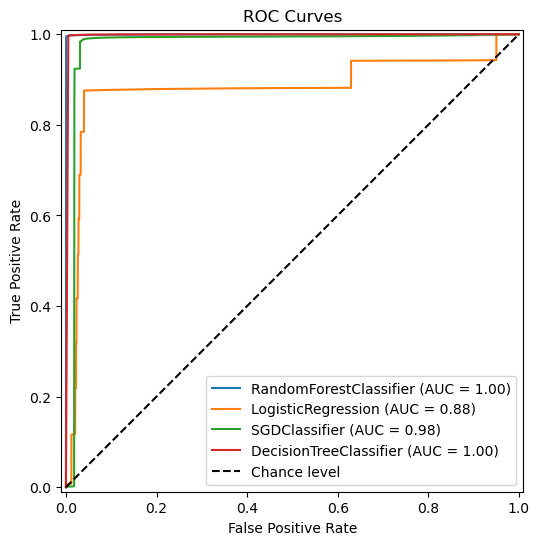

In [11]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for model_name in models.keys():
    model = models[model_name]['model']
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


    

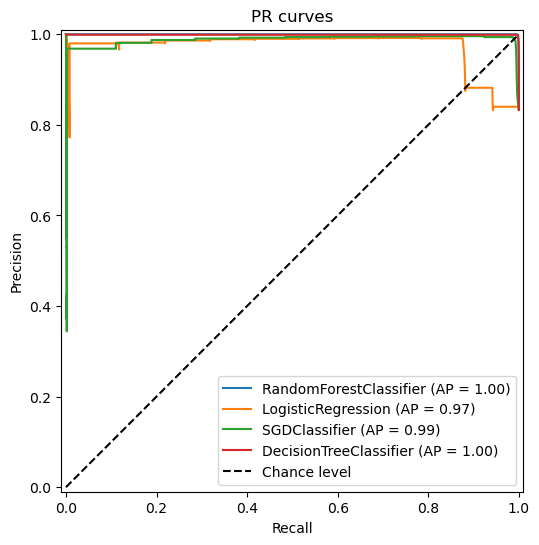

In [12]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for model_name in models.keys():
    model = models[model_name]['model']
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curves')
plt.legend()
plt.show()

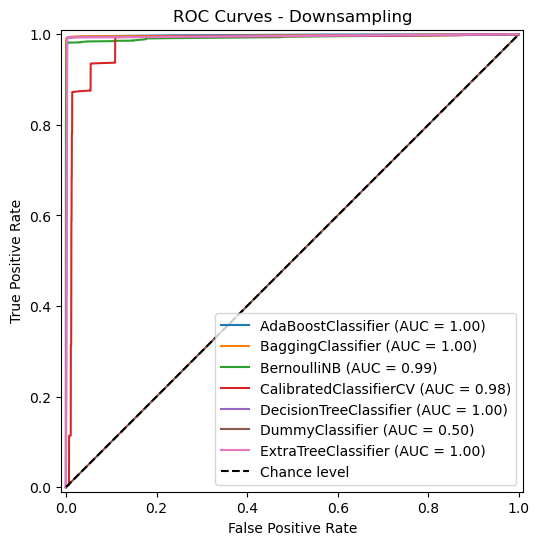

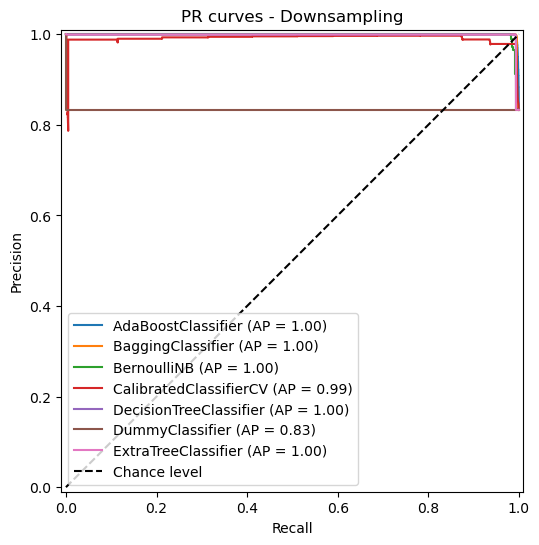

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/Ada_to_extra_downsampling.pkl'
models = load_model(model_filename)

# Load the dataset
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data.parquet')
df['VD'] = df['VD'].fillna(df['VD'].mean())

# Define X (features) and y (target)
X = df.drop(columns=['labels'])  # Features
y = df['labels']  # Target labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Downsampling')
plt.legend()
plt.show()

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for model_name in models.keys():
    model = models[model_name]
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curves - Downsampling')
plt.legend()
plt.show()

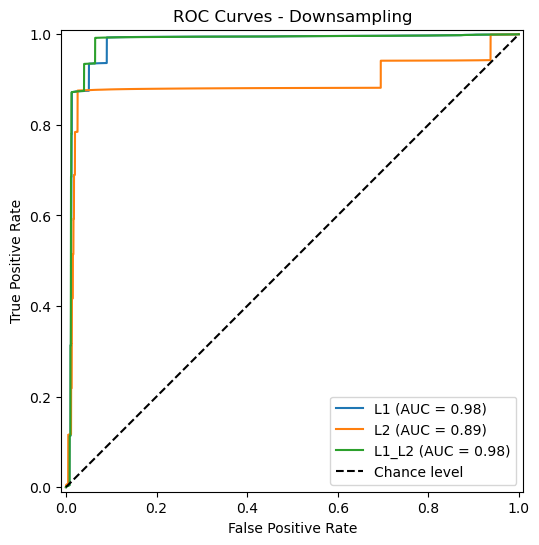

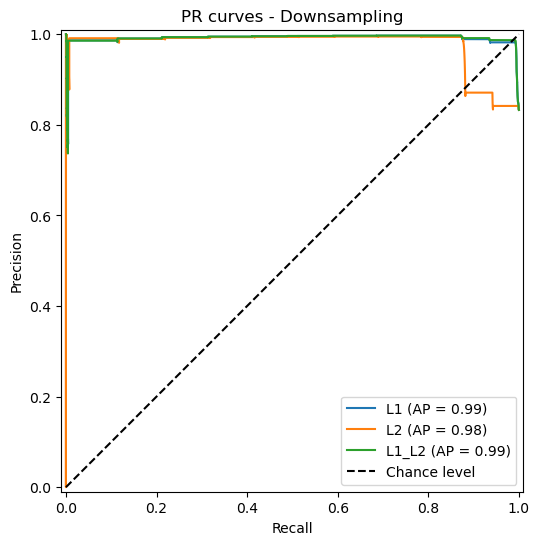

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/LR_downsam_L1_L2'
models = load_model(model_filename)

# Load the dataset
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data.parquet')
df['VD'] = df['VD'].fillna(df['VD'].mean())

# Define X (features) and y (target)
X = df.drop(columns=['labels'])  # Features
y = df['labels']  # Target labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Downsampling')
plt.legend()
plt.show()

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for model_name in models.keys():
    model = models[model_name]
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curves - Downsampling')
plt.legend()
plt.show()

KeyboardInterrupt: 

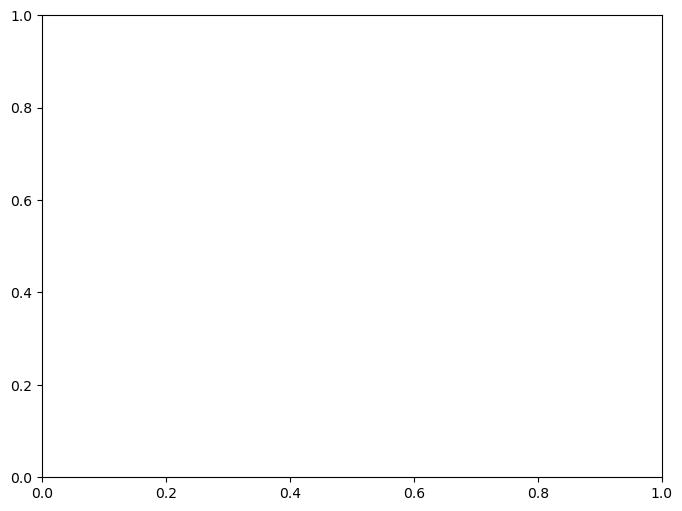

: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

# Function to load the saved model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    return model

# Load your AdaBoostClassifier model from the pickle file
model_filename = '/home/ndo/vardict_ML/models_output/Extra_to_LGBMC_downsampling.pkl'
models = load_model(model_filename)


# Load the dataset
df = pd.read_parquet('/home/ndo/vardict_ML/processed_data.parquet')
df['VD'] = df['VD'].fillna(df['VD'].mean())

# Define X (features) and y (target)
X = df.drop(columns=['labels'])  # Features
y = df['labels']  # Target labels


# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())


plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Downsampling')
plt.legend()
plt.show()

# from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
# for model_name in models.keys():
#     model = models[model_name]
#     PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())

# plt.plot([0, 1], [0, 1], 'k--', label='Chance level')  # Add chance level line
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('PR curves - Downsampling')
# plt.legend()
# plt.show()